In [1]:
import pandas as pd

class DataFrameTransformer:
    @staticmethod
    def _apply_transformation(df, columns, transformation_func):
        for col in columns:
            df[col] = transformation_func(df[col])
        return df

    @staticmethod
    def convert_columns_to_numeric(df, columns):
        transformation_func = pd.to_numeric
        return DataFrameTransformer._apply_transformation(df, columns, transformation_func)

    @staticmethod
    def convert_columns_to_datetime(df, columns, date_formats=None):
        if date_formats is None:
            date_formats = {}
        
        def transform_date(col):
            if col.name in date_formats:
                return pd.to_datetime(col, errors='coerce', format=date_formats[col.name])
            else:
                return pd.to_datetime(col, errors='coerce')

        return DataFrameTransformer._apply_transformation(df, columns, transform_date)

    @staticmethod
    def convert_columns_to_categorical(df, columns):
        transformation_func = lambda col: col.astype('category')
        return DataFrameTransformer._apply_transformation(df, columns, transformation_func)

    @staticmethod
    def remove_excess_symbols(df, columns, symbols):
        transformation_func = lambda col: col.str.replace(symbols, '')
        return DataFrameTransformer._apply_transformation(df, columns, transformation_func)

if __name__ == "__main__":
    # Load data
    df = pd.read_csv('data.csv')

    # Instantiate DataFrameTransformer class
    transformer = DataFrameTransformer()

    # Define columns needing format adjustments
    numeric_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'annual_inc', 'last_payment_amount', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int' ]  # Update with actual column names
    date_columns = ['issue_date', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date' ]  # Update with actual column names
    categorical_columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'application_type', 'payment_plan', 'grade', 'sub_grade' ]  # Update with actual column names
    columns_with_symbols = ['purpose']  # Update with actual column names

    # Specify date formats for specific columns
    date_formats = {'issue_date': '%Y-%m-%d', 'last_payment_date': '%Y/%m/%d', 'next_payment_date': '%d-%m-%Y', 'last_credit_pull_date': '%m/%d/%Y'}

    # Apply transformations
    df = transformer.convert_columns_to_numeric(df, numeric_columns)
    df = transformer.convert_columns_to_datetime(df, date_columns, date_formats)
    df = transformer.convert_columns_to_categorical(df, categorical_columns)
    df = transformer.remove_excess_symbols(df, columns_with_symbols, '@#$')

    # Verify transformations
    print(df.dtypes)  # Check data types of columns
    print(df.head())  # View sample of transformed data


id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term                                   object
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                      object
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                                object
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line                   object
inq_last_6mths                    

In [2]:
import pandas as pd

class DataFrameInfo:
    def __init__(self, df: pd.DataFrame):
        self.df = df

    def _get_categorical_columns(self) -> list:
        return [col for col in self.df.columns if self.df[col].dtype == 'object']

    def _get_numeric_columns(self) -> list:
        return [col for col in self.df.columns if self.df[col].dtype != 'object']

    def describe_columns(self) -> pd.Series:
        return self.df.dtypes

    def get_statistics(self) -> pd.DataFrame:
        return self.df.describe()

    def count_distinct_values(self) -> dict:
        distinct_counts = {}
        for column in self._get_categorical_columns():
            distinct_counts[column] = len(self.df[column].unique())
        return distinct_counts

    def print_shape(self) -> None:
        print("Shape of DataFrame:", self.df.shape)

    def count_null_values(self) -> pd.Series:
        return self.df.isnull().sum()

if __name__ == "__main__":
    # Load DataFrame from CSV file
    file_path = '/Users/fahiyeyusuf/Desktop/CLIF_data.csv'
    df = pd.read_csv(file_path)

    # Example usage:
    df_info = DataFrameInfo(df)

    # Describe all columns
    print("Data Types of Columns:")
    print(df_info.describe_columns())

    # Extract statistical values
    print("\nStatistical Values:")
    print(df_info.get_statistics())

    # Count distinct values in categorical columns
    print("\nDistinct Value Counts:")
    print(df_info.count_distinct_values())

    # Print out the shape of the DataFrame
    print("\nDataFrame Shape:")
    df_info.print_shape()

    # Generate a count/percentage count of NULL values in each column
    print("\nCount of NULL Values:")
    print(df_info.count_null_values())


Data Types of Columns:
id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
to

NULL counts in each column:
id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts                     0
out_prncp 

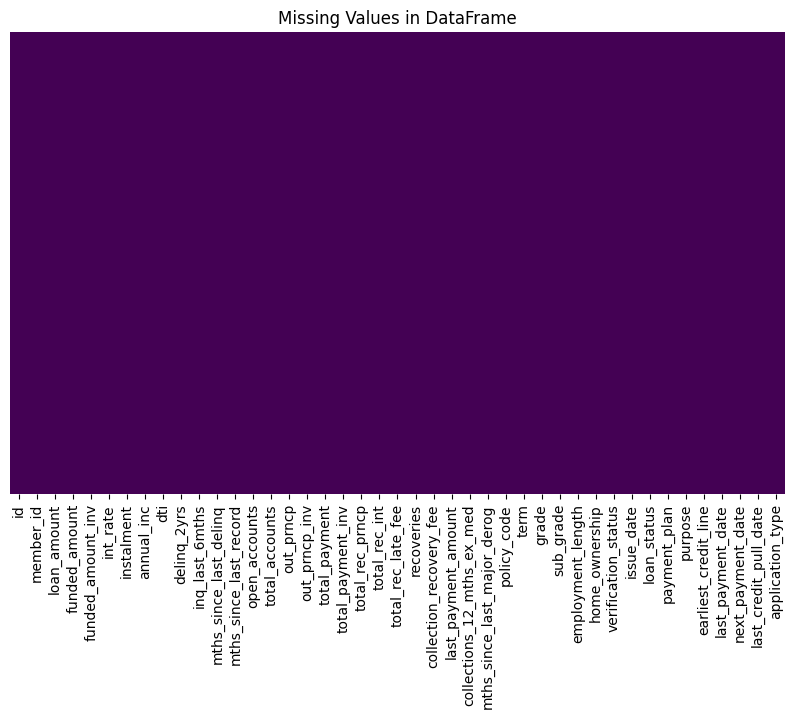

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class Plotter:
    @staticmethod
    def visualize_nulls(df: pd.DataFrame) -> None:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
        plt.title('Missing Values in DataFrame')
        plt.show()

class DataFrameTransform:
    @staticmethod
    def check_nulls(df: pd.DataFrame) -> pd.Series:
        return df.isnull().sum()

    @staticmethod
    def remove_specific_values(df: pd.DataFrame, columns_to_clean: dict) -> pd.DataFrame:
        """
        Remove specific values within columns and replace them with NaN.
        columns_to_clean should be a dictionary where keys are column names and values are lists of values to remove.
        """
        for col, values_to_remove in columns_to_clean.items():
            df[col] = df[col].replace(values_to_remove, pd.NA)
        return df

    @staticmethod
    def impute_missing(df: pd.DataFrame, strategy: str = 'median') -> pd.DataFrame:
        numeric_columns = df.select_dtypes(include=['number']).columns
        non_numeric_columns = df.select_dtypes(exclude=['number']).columns

        if strategy == 'median':
            df_numeric = df[numeric_columns].fillna(df[numeric_columns].median())
        elif strategy == 'mean':
            df_numeric = df[numeric_columns].fillna(df[numeric_columns].mean())

        df_non_numeric = df[non_numeric_columns].fillna(df[non_numeric_columns].mode().iloc[0])

        return pd.concat([df_numeric, df_non_numeric], axis=1)

if __name__ == "__main__":
    # Load DataFrame from CSV file
    file_path = '/Users/fahiyeyusuf/Desktop/CLIF_data.csv'
    df = pd.read_csv(file_path)

    # Example usage:
    # Step 1: Determine the amount of NULLs in each column
    null_counts = DataFrameTransform.check_nulls(df)
    print("NULL counts in each column:")
    print(null_counts)

    # Step 2: Remove specific values within columns
    columns_to_clean = {'term': ['< 1 year', '10+ years'], 'employment_length': ['< 1 year', '10+ years']}
    df = DataFrameTransform.remove_specific_values(df, columns_to_clean)

    # Step 3: Impute missing values
    # Let's say we choose to impute missing values with the median for numerical columns
    df = DataFrameTransform.impute_missing(df, strategy='median')

    # Step 4: Check that all NULLs have been removed
    null_counts_after = DataFrameTransform.check_nulls(df)
    print("\nNULL counts in each column after imputation:")
    print(null_counts_after)

    # Visualize the removal of NULL values
    Plotter.visualize_nulls(df)

    # Save the cleaned DataFrame to a new CSV file
    output_file_path = '/Users/fahiyeyusuf/Desktop/CLIF_data_specific_values_cleaned.csv'
    df.to_csv(output_file_path, index=False)
